In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline            

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

In [ ]:
data.info()

In [ ]:
sns.boxplot(data.iloc[:,0:3])

In [ ]:
data[12].value_counts()

In [ ]:
X = data.drop(12, axis=1)
y = data[12]

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

In [ ]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

In [ ]:
history.history.keys()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션

In [ ]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

In [ ]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid, y_valid), 
                   callbacks=[early_stopping_callback, checkpointer])

# 저장된 베스트 모델을 불러와서 테스트 하기

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
best_model = load_model("./model/001--0.0356.keras")  # .h5

In [ ]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, best_pred))

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
wine = pd.read_csv("../06machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [94]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [95]:
wine['quality'].nunique()

7

In [96]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


<Axes: >

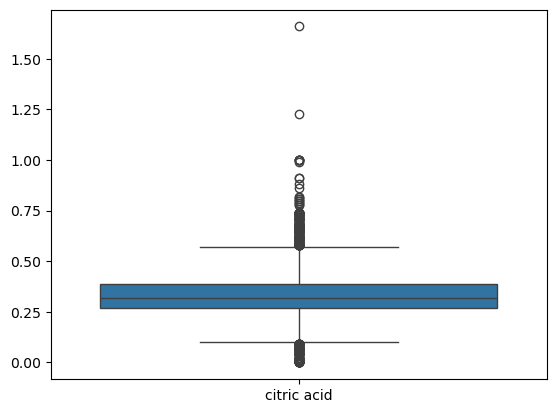

In [100]:
sns.boxplot(wine.iloc[:,2:3])

In [101]:
from sklearn.preprocessing import RobustScaler

In [102]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [104]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [105]:
y.head()

0    6
1    6
2    6
3    6
4    6
Name: quality, dtype: int64

In [106]:
rbs = RobustScaler()
X_scaled = rbs.fit_transform(X)


In [107]:
y = pd.get_dummies(y)
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [108]:
from sklearn.model_selection import train_test_split

In [109]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [110]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [115]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [112]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(7, activation='softmax'))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                384       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 32)                2080      
                                                                 
 dense_21 (Dense)            (None, 16)                528       
                                                                 
 dense_22 (Dense)            (None, 7)                 119       
                                                                 
Total params: 5,223
Trainable params: 5,223
Non-trainable params: 0
_________________________________________________________________


In [134]:
model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(patience=200) 
filepath = "./model/white_wine{epoch:04d}__{val_loss:.4f}.keras"
model_save = ModelCheckpoint(filepath=filepath, save_best_only=True)
history = model.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid),
                   callbacks=[early_stop, model_save])

Epoch 1/10000
5/6 [========================>.....] - ETA: 0s - loss: 0.6490 - accuracy: 0.7532

2024-09-10 14:35:42.829133: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:35:42.912421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:35:42.912557: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 1s 91ms/step - loss: 0.6488 - accuracy: 0.7526 - val_loss: 1.2094 - val_accuracy: 0.5786
Epoch 2/10000
1/6 [====>.........................] - ETA: 0s - loss: 0.6454 - accuracy: 0.7300

2024-09-10 14:35:43.232115: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 14:35:43.282349: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 14:35:43.282461: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


6/6 [==============================] - 0s 56ms/step - loss: 0.6327 - accuracy: 0.7675 - val_loss: 1.1992 - val_accuracy: 0.5724
Epoch 3/10000
6/6 [==============================] - 0s 29ms/step - loss: 0.6280 - accuracy: 0.7679 - val_loss: 1.2050 - val_accuracy: 0.5745
Epoch 4/10000
6/6 [==============================] - 0s 28ms/step - loss: 0.6251 - accuracy: 0.7624 - val_loss: 1.2098 - val_accuracy: 0.5684
Epoch 5/10000
6/6 [==============================] - 0s 26ms/step - loss: 0.6217 - accuracy: 0.7665 - val_loss: 1.2086 - val_accuracy: 0.5816
Epoch 6/10000
6/6 [==============================] - 0s 27ms/step - loss: 0.6231 - accuracy: 0.7668 - val_loss: 1.2063 - val_accuracy: 0.5724
Epoch 7/10000
6/6 [==============================] - 0s 26ms/step - loss: 0.6208 - accuracy: 0.7682 - val_loss: 1.2162 - val_accuracy: 0.5745
Epoch 8/10000
6/6 [==============================] - 0s 27ms/step - loss: 0.6199 - accuracy: 0.7685 - val_loss: 1.2152 - val_accuracy: 0.5704
Epoch 9/10000
6/6 [=

6/6 [==============================] - 0s 28ms/step - loss: 0.5489 - accuracy: 0.7948 - val_loss: 1.3439 - val_accuracy: 0.5663
Epoch 60/10000
6/6 [==============================] - 0s 31ms/step - loss: 0.5447 - accuracy: 0.8005 - val_loss: 1.3359 - val_accuracy: 0.5653
Epoch 61/10000
6/6 [==============================] - 0s 29ms/step - loss: 0.5455 - accuracy: 0.7978 - val_loss: 1.3426 - val_accuracy: 0.5724
Epoch 62/10000
6/6 [==============================] - 0s 28ms/step - loss: 0.5421 - accuracy: 0.8009 - val_loss: 1.3436 - val_accuracy: 0.5673
Epoch 63/10000
6/6 [==============================] - 0s 26ms/step - loss: 0.5408 - accuracy: 0.8019 - val_loss: 1.3483 - val_accuracy: 0.5653
Epoch 64/10000
6/6 [==============================] - 0s 26ms/step - loss: 0.5392 - accuracy: 0.8029 - val_loss: 1.3412 - val_accuracy: 0.5714
Epoch 65/10000
6/6 [==============================] - 0s 27ms/step - loss: 0.5370 - accuracy: 0.8033 - val_loss: 1.3595 - val_accuracy: 0.5755
Epoch 66/10000

6/6 [==============================] - 0s 36ms/step - loss: 0.4720 - accuracy: 0.8390 - val_loss: 1.4872 - val_accuracy: 0.5704
Epoch 117/10000
6/6 [==============================] - 0s 30ms/step - loss: 0.4691 - accuracy: 0.8400 - val_loss: 1.4941 - val_accuracy: 0.5653
Epoch 118/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.4679 - accuracy: 0.8390 - val_loss: 1.4876 - val_accuracy: 0.5643
Epoch 119/10000
6/6 [==============================] - 0s 31ms/step - loss: 0.4707 - accuracy: 0.8359 - val_loss: 1.4911 - val_accuracy: 0.5704
Epoch 120/10000
6/6 [==============================] - 0s 25ms/step - loss: 0.4743 - accuracy: 0.8298 - val_loss: 1.5267 - val_accuracy: 0.5673
Epoch 121/10000
6/6 [==============================] - 0s 37ms/step - loss: 0.4701 - accuracy: 0.8376 - val_loss: 1.5100 - val_accuracy: 0.5633
Epoch 122/10000
6/6 [==============================] - 0s 40ms/step - loss: 0.4658 - accuracy: 0.8390 - val_loss: 1.5065 - val_accuracy: 0.5673
Epoch 12

6/6 [==============================] - 0s 40ms/step - loss: 0.4099 - accuracy: 0.8622 - val_loss: 1.6507 - val_accuracy: 0.5714
Epoch 174/10000
6/6 [==============================] - 0s 32ms/step - loss: 0.4126 - accuracy: 0.8618 - val_loss: 1.6511 - val_accuracy: 0.5684
Epoch 175/10000
6/6 [==============================] - 0s 30ms/step - loss: 0.4075 - accuracy: 0.8693 - val_loss: 1.6633 - val_accuracy: 0.5735
Epoch 176/10000
6/6 [==============================] - 0s 44ms/step - loss: 0.4064 - accuracy: 0.8635 - val_loss: 1.6746 - val_accuracy: 0.5694
Epoch 177/10000
6/6 [==============================] - 0s 45ms/step - loss: 0.4119 - accuracy: 0.8594 - val_loss: 1.6865 - val_accuracy: 0.5673
Epoch 178/10000
6/6 [==============================] - 0s 30ms/step - loss: 0.4066 - accuracy: 0.8639 - val_loss: 1.6775 - val_accuracy: 0.5663
Epoch 179/10000
6/6 [==============================] - 0s 39ms/step - loss: 0.4064 - accuracy: 0.8635 - val_loss: 1.6758 - val_accuracy: 0.5694
Epoch 18

In [129]:
wine_best_model = load_model("./model/white_wine0080__1.0441.keras")
wine_pred = wine_best_model.predict(X_test)
wine_pred = pd.DataFrame(wine_pred, columns=y.columns)

31/31 [==============================] - 0s 5ms/step


2024-09-10 14:33:43.121035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [130]:
wine_pred

,3,4,5,6,7,8,9
0,0.003664,0.015081,0.164681,0.732120,0.078662,0.004854,0.000938
1,0.006332,0.005709,0.050762,0.725189,0.174247,0.034774,0.002987
2,0.004762,0.044277,0.171552,0.671563,0.097747,0.009512,0.000586
3,0.001768,0.009709,0.137829,0.624635,0.204989,0.020583,0.000486
4,0.001134,0.002442,0.103820,0.791937,0.089387,0.010867,0.000414
...,...,...,...,...,...,...,...
975,0.014046,0.055832,0.505235,0.344132,0.053995,0.021373,0.005388
976,0.000134,0.521802,0.468078,0.009701,0.000229,0.000046,0.000008
977,0.005533,0.005976,0.254784,0.614951,0.102578,0.014733,0.001446
978,0.006346,0.074948,0.289924,0.579959,0.043068,0.003653,0.002101


In [132]:
y_test_class = y_test.idxmax(axis=1)
y_test_class = y_test_class.reset_index(drop=True)
y_test_class

0      6
1      6
2      7
3      7
4      5
      ..
975    6
976    4
977    5
978    6
979    6
Length: 980, dtype: int64

In [121]:
wine_pred_class = wine_pred.idxmax(axis=1)
wine_pred_class

0      6
1      6
2      6
3      6
4      6
      ..
975    5
976    4
977    6
978    6
979    6
Length: 980, dtype: int64

In [135]:
y.value_counts()

3      4      5      6      7      8      9    
False  False  False  True   False  False  False    2198
              True   False  False  False  False    1457
              False  False  True   False  False     880
                            False  True   False     175
       True   False  False  False  False  False     163
True   False  False  False  False  False  False      20
False  False  False  False  False  False  True        5
Name: count, dtype: int64

In [133]:
print(classification_report(y_test_class, wine_pred_class))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.56      0.15      0.24        33
           5       0.62      0.53      0.57       291
           6       0.55      0.77      0.64       440
           7       0.56      0.32      0.41       176
           8       1.00      0.03      0.06        35
           9       0.00      0.00      0.00         1

    accuracy                           0.57       980
   macro avg       0.47      0.26      0.27       980
weighted avg       0.58      0.57      0.54       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [141]:
from sklearn.preprocessing import LabelEncoder

In [142]:
le = LabelEncoder()
y2_labeled = le.fit_transform(y2)
y2_labeled

array([3, 3, 3, ..., 3, 4, 3])

XGB로 비교분석

In [143]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y2_labeled, test_size=0.4, stratify=y2_labeled, random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [ ]:
# !pip install xgboost

In [144]:
from xgboost import XGBClassifier

In [147]:
xgb = XGBClassifier(max_depth= 5, n_estimators=1000, random_state=10, n_jobs=-1)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_valid2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.48      0.33      0.39        33
           5       0.64      0.61      0.62       291
           6       0.64      0.70      0.67       440
           7       0.59      0.60      0.59       176
           8       0.60      0.34      0.44        35
           9       0.00      0.00      0.00         1

    accuracy                           0.62       980
   macro avg       0.42      0.37      0.39       980
weighted avg       0.62      0.62      0.62       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [44]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [47]:
X = wine.drop('quality', axis=1).copy()
y = wine['quality'].copy()
y2 = wine['quality'].copy()

In [48]:
y = pd.get_dummies(y)

In [49]:
y

,3,4,5,6,7,8,9
0,False,False,False,True,False,False,False
1,False,False,False,True,False,False,False
2,False,False,False,True,False,False,False
3,False,False,False,True,False,False,False
4,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...
4893,False,False,False,True,False,False,False
4894,False,False,True,False,False,False,False
4895,False,False,False,True,False,False,False
4896,False,False,False,False,True,False,False


In [50]:
from sklearn.preprocessing import RobustScaler

In [51]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y ,random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [54]:
X_train.dtype

dtype('float64')

In [55]:
print(X_train.shape, X_valid.shape, X_test.shape)

(2938, 11) (980, 11) (980, 11)


In [56]:
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [57]:
model1 = Sequential()
model1.add(Dense(64, input_dim=11, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(16, activation='relu'))
model1.add(Dense(7, activation='softmax'))

In [58]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                768       
                                                                 
 dense_13 (Dense)            (None, 32)                2080      
                                                                 
 dense_14 (Dense)            (None, 64)                2112      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 7)                 119       
                                                                 
Total params: 7,687
Trainable params: 7,687
Non-traina

In [59]:
print(X_train.shape, y_train.shape)

(2938, 11) (2938, 7)


In [62]:
model1.compile(loss="categorical_crossentropy", optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', patience=1000)
modelpath = "./model/wine_model{epoch:0003d}__{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)
history = model1.fit(X_train, y_train, epochs=10000, batch_size=500, validation_data=(X_valid, y_valid), callbacks=[early_stop, checkpointer])

Epoch 1/10000
5/6 [========================>.....] - ETA: 0s - loss: 0.6961 - accuracy: 0.7264

2024-09-10 13:25:53.871275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 13:25:53.958331: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 13:25:53.958403: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-09-10 13:25:54.220448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 13:25:54.263323: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to

6/6 [==============================] - 1s 112ms/step - loss: 0.6953 - accuracy: 0.7267 - val_loss: 1.0956 - val_accuracy: 0.5704
Epoch 2/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6792 - accuracy: 0.7291 - val_loss: 1.1067 - val_accuracy: 0.5724
Epoch 3/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6700 - accuracy: 0.7338 - val_loss: 1.1088 - val_accuracy: 0.5776
Epoch 4/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6666 - accuracy: 0.7410 - val_loss: 1.1085 - val_accuracy: 0.5816
Epoch 5/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.6607 - accuracy: 0.7471 - val_loss: 1.1134 - val_accuracy: 0.5827
Epoch 6/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.6562 - accuracy: 0.7495 - val_loss: 1.1138 - val_accuracy: 0.5837
Epoch 7/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.6513 - accuracy: 0.7488 - val_loss: 1.1176 - val_accuracy: 0.5867
Epoch 8/10000
6/6 [

6/6 [==============================] - 0s 50ms/step - loss: 0.5052 - accuracy: 0.8111 - val_loss: 1.3158 - val_accuracy: 0.5765
Epoch 59/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.5043 - accuracy: 0.8118 - val_loss: 1.3200 - val_accuracy: 0.5745
Epoch 60/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.5006 - accuracy: 0.8142 - val_loss: 1.3282 - val_accuracy: 0.5653
Epoch 61/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.4983 - accuracy: 0.8182 - val_loss: 1.3253 - val_accuracy: 0.5796
Epoch 62/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.4966 - accuracy: 0.8196 - val_loss: 1.3376 - val_accuracy: 0.5694
Epoch 63/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.4926 - accuracy: 0.8159 - val_loss: 1.3374 - val_accuracy: 0.5765
Epoch 64/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.4914 - accuracy: 0.8206 - val_loss: 1.3432 - val_accuracy: 0.5745
Epoch 65/10000

6/6 [==============================] - 0s 51ms/step - loss: 0.3712 - accuracy: 0.8775 - val_loss: 1.6128 - val_accuracy: 0.5755
Epoch 116/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.3719 - accuracy: 0.8713 - val_loss: 1.6118 - val_accuracy: 0.5786
Epoch 117/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.3705 - accuracy: 0.8764 - val_loss: 1.6069 - val_accuracy: 0.5786
Epoch 118/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.3730 - accuracy: 0.8662 - val_loss: 1.6230 - val_accuracy: 0.5765
Epoch 119/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.3696 - accuracy: 0.8730 - val_loss: 1.6389 - val_accuracy: 0.5735
Epoch 120/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.3678 - accuracy: 0.8734 - val_loss: 1.6422 - val_accuracy: 0.5684
Epoch 121/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.3651 - accuracy: 0.8720 - val_loss: 1.6560 - val_accuracy: 0.5776
Epoch 12

6/6 [==============================] - 0s 47ms/step - loss: 0.2751 - accuracy: 0.9183 - val_loss: 1.9710 - val_accuracy: 0.5878
Epoch 173/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.2759 - accuracy: 0.9091 - val_loss: 2.0008 - val_accuracy: 0.5714
Epoch 174/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.2734 - accuracy: 0.9180 - val_loss: 1.9920 - val_accuracy: 0.5867
Epoch 175/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.2669 - accuracy: 0.9190 - val_loss: 2.0175 - val_accuracy: 0.5704
Epoch 176/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.2662 - accuracy: 0.9197 - val_loss: 2.0045 - val_accuracy: 0.5888
Epoch 177/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.2677 - accuracy: 0.9183 - val_loss: 2.0250 - val_accuracy: 0.5806
Epoch 178/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.2617 - accuracy: 0.9200 - val_loss: 2.0505 - val_accuracy: 0.5857
Epoch 17

6/6 [==============================] - 0s 46ms/step - loss: 0.1979 - accuracy: 0.9418 - val_loss: 2.4489 - val_accuracy: 0.5888
Epoch 230/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.1897 - accuracy: 0.9449 - val_loss: 2.4769 - val_accuracy: 0.5939
Epoch 231/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.1913 - accuracy: 0.9442 - val_loss: 2.4951 - val_accuracy: 0.5908
Epoch 232/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1921 - accuracy: 0.9438 - val_loss: 2.4813 - val_accuracy: 0.5878
Epoch 233/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1882 - accuracy: 0.9445 - val_loss: 2.4835 - val_accuracy: 0.5837
Epoch 234/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.1846 - accuracy: 0.9489 - val_loss: 2.4790 - val_accuracy: 0.5888
Epoch 235/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1853 - accuracy: 0.9476 - val_loss: 2.5038 - val_accuracy: 0.5949
Epoch 23

6/6 [==============================] - 0s 49ms/step - loss: 0.1307 - accuracy: 0.9656 - val_loss: 3.0159 - val_accuracy: 0.5918
Epoch 287/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1259 - accuracy: 0.9697 - val_loss: 3.0116 - val_accuracy: 0.5888
Epoch 288/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.1269 - accuracy: 0.9704 - val_loss: 3.0346 - val_accuracy: 0.5837
Epoch 289/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.1347 - accuracy: 0.9629 - val_loss: 3.0262 - val_accuracy: 0.5867
Epoch 290/10000
6/6 [==============================] - 0s 45ms/step - loss: 0.1387 - accuracy: 0.9636 - val_loss: 3.0635 - val_accuracy: 0.5898
Epoch 291/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.1320 - accuracy: 0.9660 - val_loss: 3.0543 - val_accuracy: 0.5857
Epoch 292/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.1308 - accuracy: 0.9663 - val_loss: 3.1053 - val_accuracy: 0.5847
Epoch 29

6/6 [==============================] - 0s 47ms/step - loss: 0.0833 - accuracy: 0.9830 - val_loss: 3.6147 - val_accuracy: 0.5959
Epoch 344/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0853 - accuracy: 0.9830 - val_loss: 3.6352 - val_accuracy: 0.5990
Epoch 345/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0842 - accuracy: 0.9840 - val_loss: 3.6378 - val_accuracy: 0.6000
Epoch 346/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0818 - accuracy: 0.9837 - val_loss: 3.6576 - val_accuracy: 0.5929
Epoch 347/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0816 - accuracy: 0.9816 - val_loss: 3.6955 - val_accuracy: 0.5939
Epoch 348/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0821 - accuracy: 0.9806 - val_loss: 3.6917 - val_accuracy: 0.5969
Epoch 349/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0821 - accuracy: 0.9833 - val_loss: 3.6719 - val_accuracy: 0.5949
Epoch 35

6/6 [==============================] - 0s 62ms/step - loss: 0.0564 - accuracy: 0.9894 - val_loss: 4.2673 - val_accuracy: 0.5939
Epoch 401/10000
6/6 [==============================] - 0s 57ms/step - loss: 0.0589 - accuracy: 0.9888 - val_loss: 4.3001 - val_accuracy: 0.5980
Epoch 402/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0586 - accuracy: 0.9894 - val_loss: 4.2624 - val_accuracy: 0.5918
Epoch 403/10000
6/6 [==============================] - 0s 81ms/step - loss: 0.0578 - accuracy: 0.9888 - val_loss: 4.2511 - val_accuracy: 0.5939
Epoch 404/10000
6/6 [==============================] - 0s 77ms/step - loss: 0.0590 - accuracy: 0.9884 - val_loss: 4.2776 - val_accuracy: 0.5929
Epoch 405/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0553 - accuracy: 0.9905 - val_loss: 4.2659 - val_accuracy: 0.5929
Epoch 406/10000
6/6 [==============================] - 0s 86ms/step - loss: 0.0557 - accuracy: 0.9894 - val_loss: 4.2932 - val_accuracy: 0.5939
Epoch 40

6/6 [==============================] - 0s 49ms/step - loss: 0.0448 - accuracy: 0.9918 - val_loss: 4.8663 - val_accuracy: 0.5959
Epoch 458/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0456 - accuracy: 0.9915 - val_loss: 4.9075 - val_accuracy: 0.5969
Epoch 459/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0525 - accuracy: 0.9891 - val_loss: 4.8521 - val_accuracy: 0.5929
Epoch 460/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0477 - accuracy: 0.9912 - val_loss: 4.8502 - val_accuracy: 0.6020
Epoch 461/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0467 - accuracy: 0.9901 - val_loss: 4.8796 - val_accuracy: 0.5929
Epoch 462/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0409 - accuracy: 0.9942 - val_loss: 4.9165 - val_accuracy: 0.5959
Epoch 463/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0435 - accuracy: 0.9918 - val_loss: 4.9134 - val_accuracy: 0.5939
Epoch 46

6/6 [==============================] - 0s 50ms/step - loss: 0.0285 - accuracy: 0.9946 - val_loss: 5.3216 - val_accuracy: 0.5939
Epoch 515/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0289 - accuracy: 0.9949 - val_loss: 5.2984 - val_accuracy: 0.6020
Epoch 516/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0300 - accuracy: 0.9935 - val_loss: 5.3174 - val_accuracy: 0.5949
Epoch 517/10000
6/6 [==============================] - 0s 52ms/step - loss: 0.0296 - accuracy: 0.9946 - val_loss: 5.3697 - val_accuracy: 0.5980
Epoch 518/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0276 - accuracy: 0.9946 - val_loss: 5.3823 - val_accuracy: 0.5908
Epoch 519/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0291 - accuracy: 0.9952 - val_loss: 5.3465 - val_accuracy: 0.5980
Epoch 520/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0268 - accuracy: 0.9956 - val_loss: 5.3838 - val_accuracy: 0.5939
Epoch 52

6/6 [==============================] - 0s 47ms/step - loss: 0.0197 - accuracy: 0.9956 - val_loss: 5.7020 - val_accuracy: 0.5929
Epoch 572/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0210 - accuracy: 0.9959 - val_loss: 5.7194 - val_accuracy: 0.5959
Epoch 573/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0215 - accuracy: 0.9963 - val_loss: 5.7395 - val_accuracy: 0.5929
Epoch 574/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0228 - accuracy: 0.9949 - val_loss: 5.7470 - val_accuracy: 0.5929
Epoch 575/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0197 - accuracy: 0.9966 - val_loss: 5.7246 - val_accuracy: 0.5969
Epoch 576/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 5.7421 - val_accuracy: 0.5959
Epoch 577/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0211 - accuracy: 0.9956 - val_loss: 5.7712 - val_accuracy: 0.5918
Epoch 57

Epoch 628/10000
6/6 [==============================] - 0s 64ms/step - loss: 0.0185 - accuracy: 0.9966 - val_loss: 6.0786 - val_accuracy: 0.5929
Epoch 629/10000
6/6 [==============================] - 0s 84ms/step - loss: 0.0192 - accuracy: 0.9959 - val_loss: 6.1194 - val_accuracy: 0.5898
Epoch 630/10000
6/6 [==============================] - 0s 89ms/step - loss: 0.0173 - accuracy: 0.9969 - val_loss: 6.0696 - val_accuracy: 0.5898
Epoch 631/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0207 - accuracy: 0.9956 - val_loss: 6.0152 - val_accuracy: 0.5969
Epoch 632/10000
6/6 [==============================] - 0s 84ms/step - loss: 0.0209 - accuracy: 0.9959 - val_loss: 6.0785 - val_accuracy: 0.5969
Epoch 633/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0191 - accuracy: 0.9963 - val_loss: 6.1293 - val_accuracy: 0.5929
Epoch 634/10000
6/6 [==============================] - 0s 94ms/step - loss: 0.0171 - accuracy: 0.9963 - val_loss: 6.0777 - val_accuracy:

Epoch 685/10000
6/6 [==============================] - 0s 67ms/step - loss: 0.0182 - accuracy: 0.9959 - val_loss: 6.3296 - val_accuracy: 0.5949
Epoch 686/10000
6/6 [==============================] - 0s 73ms/step - loss: 0.0144 - accuracy: 0.9976 - val_loss: 6.2318 - val_accuracy: 0.5969
Epoch 687/10000
6/6 [==============================] - 0s 74ms/step - loss: 0.0141 - accuracy: 0.9976 - val_loss: 6.2687 - val_accuracy: 0.5959
Epoch 688/10000
6/6 [==============================] - 0s 60ms/step - loss: 0.0138 - accuracy: 0.9983 - val_loss: 6.3293 - val_accuracy: 0.5939
Epoch 689/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0142 - accuracy: 0.9976 - val_loss: 6.2018 - val_accuracy: 0.5878
Epoch 690/10000
6/6 [==============================] - 0s 82ms/step - loss: 0.0186 - accuracy: 0.9969 - val_loss: 6.3459 - val_accuracy: 0.5949
Epoch 691/10000
6/6 [==============================] - 0s 66ms/step - loss: 0.0162 - accuracy: 0.9976 - val_loss: 6.2805 - val_accuracy:

Epoch 742/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0154 - accuracy: 0.9976 - val_loss: 6.4385 - val_accuracy: 0.5867
Epoch 743/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0153 - accuracy: 0.9973 - val_loss: 6.5367 - val_accuracy: 0.5949
Epoch 744/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0149 - accuracy: 0.9973 - val_loss: 6.4887 - val_accuracy: 0.5939
Epoch 745/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0137 - accuracy: 0.9966 - val_loss: 6.5214 - val_accuracy: 0.5888
Epoch 746/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 6.6450 - val_accuracy: 0.5908
Epoch 747/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0145 - accuracy: 0.9980 - val_loss: 6.5177 - val_accuracy: 0.5929
Epoch 748/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0177 - accuracy: 0.9952 - val_loss: 6.5726 - val_accuracy:

Epoch 799/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0153 - accuracy: 0.9966 - val_loss: 6.7942 - val_accuracy: 0.5867
Epoch 800/10000
6/6 [==============================] - 0s 61ms/step - loss: 0.0177 - accuracy: 0.9969 - val_loss: 6.8127 - val_accuracy: 0.5908
Epoch 801/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0128 - accuracy: 0.9966 - val_loss: 6.9291 - val_accuracy: 0.5908
Epoch 802/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.0122 - accuracy: 0.9983 - val_loss: 6.7815 - val_accuracy: 0.5959
Epoch 803/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0108 - accuracy: 0.9980 - val_loss: 6.8269 - val_accuracy: 0.5929
Epoch 804/10000
6/6 [==============================] - 0s 51ms/step - loss: 0.0122 - accuracy: 0.9973 - val_loss: 6.8664 - val_accuracy: 0.5898
Epoch 805/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0124 - accuracy: 0.9976 - val_loss: 6.8435 - val_accuracy:

Epoch 856/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0196 - accuracy: 0.9966 - val_loss: 6.5252 - val_accuracy: 0.5959
Epoch 857/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0165 - accuracy: 0.9973 - val_loss: 6.6752 - val_accuracy: 0.5898
Epoch 858/10000
6/6 [==============================] - 0s 55ms/step - loss: 0.0172 - accuracy: 0.9966 - val_loss: 6.5243 - val_accuracy: 0.5939
Epoch 859/10000
6/6 [==============================] - 0s 54ms/step - loss: 0.0138 - accuracy: 0.9980 - val_loss: 6.6866 - val_accuracy: 0.5847
Epoch 860/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0123 - accuracy: 0.9980 - val_loss: 6.6210 - val_accuracy: 0.5939
Epoch 861/10000
6/6 [==============================] - 0s 53ms/step - loss: 0.0125 - accuracy: 0.9969 - val_loss: 6.6663 - val_accuracy: 0.5939
Epoch 862/10000
6/6 [==============================] - 0s 56ms/step - loss: 0.0106 - accuracy: 0.9980 - val_loss: 6.6418 - val_accuracy:

Epoch 913/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0080 - accuracy: 0.9980 - val_loss: 6.9283 - val_accuracy: 0.5918
Epoch 914/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0082 - accuracy: 0.9983 - val_loss: 6.9797 - val_accuracy: 0.5918
Epoch 915/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0080 - accuracy: 0.9983 - val_loss: 6.9663 - val_accuracy: 0.5908
Epoch 916/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0068 - accuracy: 0.9990 - val_loss: 7.0047 - val_accuracy: 0.5918
Epoch 917/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0075 - accuracy: 0.9973 - val_loss: 6.9707 - val_accuracy: 0.5888
Epoch 918/10000
6/6 [==============================] - 0s 49ms/step - loss: 0.0066 - accuracy: 0.9986 - val_loss: 7.0108 - val_accuracy: 0.5908
Epoch 919/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0088 - accuracy: 0.9976 - val_loss: 6.9969 - val_accuracy:

Epoch 970/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 7.2117 - val_accuracy: 0.5878
Epoch 971/10000
6/6 [==============================] - 0s 48ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 7.1579 - val_accuracy: 0.5867
Epoch 972/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0084 - accuracy: 0.9976 - val_loss: 7.2488 - val_accuracy: 0.5908
Epoch 973/10000
6/6 [==============================] - 0s 46ms/step - loss: 0.0065 - accuracy: 0.9986 - val_loss: 7.1844 - val_accuracy: 0.5878
Epoch 974/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0083 - accuracy: 0.9983 - val_loss: 7.2408 - val_accuracy: 0.5898
Epoch 975/10000
6/6 [==============================] - 0s 47ms/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 7.2466 - val_accuracy: 0.5878
Epoch 976/10000
6/6 [==============================] - 0s 50ms/step - loss: 0.0072 - accuracy: 0.9980 - val_loss: 7.2015 - val_accuracy:

In [ ]:
wine_best_model = load_model("./model/wine_model019__1.0356.keras")
pred = wine_best_model.predict(X_test)
pred = pd.DataFrame(pred)
pred


In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
predicted_classes = pred.idxmax(axis=1)

# 결과 출력
print(predicted_classes)

In [ ]:
# 각 행에서 확률이 가장 높은 클래스의 인덱스를 찾기
y_classes = y_test.idxmax(axis=1)

# 결과 출력
print(y_classes)

In [90]:
y_test

,3,4,5,6,7,8,9
1815,False,False,False,True,False,False,False
4590,False,False,False,True,False,False,False
452,False,False,False,False,True,False,False
3761,False,False,False,False,True,False,False
3899,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...
1731,False,False,False,True,False,False,False
4609,False,True,False,False,False,False,False
460,False,False,True,False,False,False,False
301,False,False,False,True,False,False,False


In [91]:
print(classification_report(y_classes, predicted_classes))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.01      0.75      0.01         4
           4       0.01      0.03      0.01        33
           5       0.00      0.00      0.00       291
           6       0.00      0.00      0.00       440
           7       0.00      0.00      0.00       176
           8       0.00      0.00      0.00        35
           9       0.00      0.00      0.00         1

    accuracy                           0.00       980
   macro avg       0.00      0.09      0.00       980
weighted avg       0.00      0.00      0.00       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


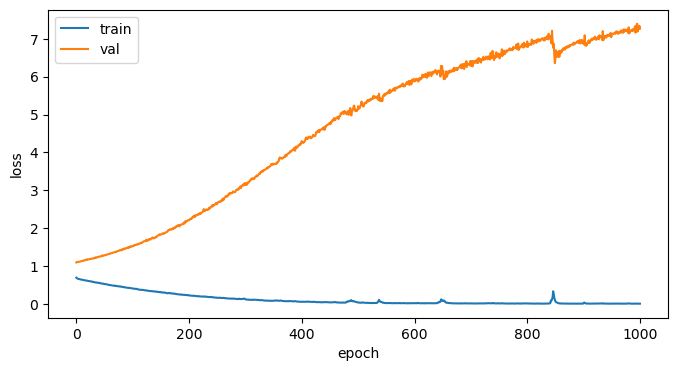

In [84]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [73]:
from sklearn.preprocessing import LabelEncoder

In [74]:
le = LabelEncoder()
y_labeled = le.fit_transform(y2)
y_labeled

array([3, 3, 3, ..., 3, 4, 3])

In [75]:
X_train2, X_valid2, y_train2, y_valid2 = train_test_split(X_scaled, y_labeled, test_size=0.4, stratify=y_labeled ,random_state=10)
X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_valid2, y_valid2, test_size=0.5, stratify=y_valid2, random_state=10)

In [76]:
# !pip install xgboost

In [78]:
from xgboost import XGBClassifier

array([6, 6, 5, 4, 6, 6, 7, 5, 6, 6, 6, 6, 7, 6, 6, 7, 6, 5, 7, 6, 5, 6,
       6, 5, 5, 4, 7, 6, 6, 6, 6, 5, 5, 6, 7, 6, 5, 5, 6, 7, 7, 6, 5, 7,
       5, 6, 7, 5, 6, 5, 6, 6, 6, 5, 6, 6, 7, 5, 5, 7, 6, 6, 6, 6, 5, 6,
       5, 6, 6, 5, 6, 6, 5, 5, 7, 7, 5, 6, 6, 6, 7, 7, 5, 8, 7, 5, 6, 7,
       7, 5, 7, 7, 5, 6, 6, 5, 6, 7, 7, 5, 6, 6, 5, 5, 4, 5, 5, 5, 6, 5,
       5, 5, 6, 5, 7, 5, 7, 6, 6, 5, 6, 7, 5, 7, 6, 6, 7, 7, 7, 4, 6, 6,
       6, 6, 5, 4, 7, 5, 5, 7, 7, 6, 6, 7, 5, 7, 7, 5, 6, 6, 5, 7, 7, 6,
       6, 8, 6, 6, 5, 7, 6, 6, 6, 8, 5, 7, 6, 5, 6, 6, 5, 6, 6, 6, 7, 6,
       6, 5, 7, 7, 6, 6, 5, 7, 7, 6, 6, 7, 5, 6, 6, 6, 6, 6, 6, 6, 8, 6,
       6, 7, 5, 8, 7, 6, 7, 5, 6, 5, 6, 5, 6, 6, 6, 6, 8, 6, 6, 7, 6, 6,
       6, 5, 6, 7, 6, 5, 7, 7, 6, 8, 7, 8, 5, 3, 5, 5, 7, 7, 5, 7, 6, 5,
       6, 6, 8, 7, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 3, 5, 6, 6, 6, 6, 5, 7,
       6, 6, 4, 5, 7, 6, 6, 6, 6, 4, 7, 5, 7, 7, 5, 6, 6, 5, 6, 7, 7, 6,
       6, 6, 5, 7, 6, 6, 6, 6, 5, 6, 6, 7, 5, 7, 6,

In [89]:
xgb = XGBClassifier(max_depth=5, n_estimators=1000, n_jobs=-1, random_state=10)
xgb.fit(X_train2, y_train2)
xgb_pred = xgb.predict(X_valid2)
print(classification_report(le.inverse_transform(y_test2), le.inverse_transform(xgb_pred)))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        32
           5       0.32      0.30      0.31       292
           6       0.47      0.51      0.49       440
           7       0.21      0.21      0.21       176
           8       0.10      0.06      0.07        35
           9       0.00      0.00      0.00         1

    accuracy                           0.36       980
   macro avg       0.16      0.16      0.16       980
weighted avg       0.35      0.36      0.35       980



/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/user/miniforge3/envs/dml/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r